## Table of Contents <a id = Contents></a>
* [1.0 Preliminary Work](#pre_work)
    * [1.1 Context](#context)
    * [1.2 Key Data Sources](#key-data-sources)
    * [1.3 Problem Statement](#problem-statement)
* [2.0 Exploratory Data Analysis (EDA)](#eda)
    * [2.1 Cleaning, Feature Engineering, Preprocessing & Visualization](#cleaning)
* [3.0 Models](#models)
    * [3.1 Random Forest](#rf)
    * [3.2 linear Regression](#lr)
   
* [4.0 Testing & Evaluation](#testing_evaluation)
    * [4.1 Test Data - Cleaning & Preprocessing](#tdcap)
    * [4.2 Retrain Model w/ Full Training Data](#rm)
***

<h2>1.0 Preliminary Work</h2> <a id = 'pre_work'></a>

***

<h3>1.1 Context</h3> <a id = 'context'></a>

This project attempts to predict sales prices for homes in Ames, Iowa based on features of the house. The project is geared towards advanced regression techniques and as such provides a dataset that requires a great deal of cleaning, feature engineering, and use of more advanced ML techniques.

<h3>1.2 Key Data Sources</h3><a id = key-data-sources></a>

The competition provides two files. A training file and a test file. The test file does not provide the target variable which helps to simulate unseen future data and eliminates data leakage.

<h2><span style="color:darkred">1.3 Problem Statement</span></h2><a id = problem-statement></a>

**Can we achieve 95% or greater accuracy in forecasting sales prices for homes in Ames, Iowa based on feature of the property?**

<h2>2.0 Exploratory Data Analysis (EDA)</h2><a id = eda></a>

***

<h3>2.1 Cleaning, Feature Engineering, Preprocessing & Visualization</h3> <a id = 'cleaning'></a>

In [2]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [3]:
# train.csv file provided by Kaggle
fdata = pd.read_csv('train.csv')

In [4]:
# check view settings
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 1465)


In [5]:
# view the data
display(fdata.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**NOTE: The Alley, MiscFeature, PoolQC, and Fence columns only have 91, 54,7, and 281 valid entries and as a majority of the columnns are NaN, they will be removed.**However, before removal they will be inspected to see if some should be recoded if the information is valuable (ex. pool vs. no pool).

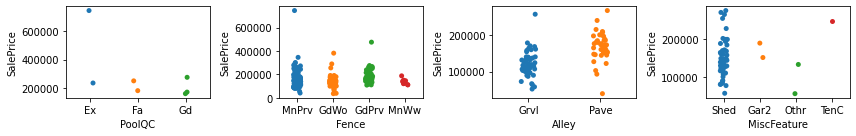

In [7]:
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(x = 'PoolQC',y = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(x = 'Fence', y = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(x = 'Alley', y = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(x = 'MiscFeature', y = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

**The PoolArea variable can speak to the impact having a pool has on the overall sale price opposed to recoding PoolQC, so PoolQC will be dropped. There doesn't appear to be a difference in the price by grouping of categories within the other 3 variables either so they will be dropped as well. If Alley had more values then it might be a good variable to include as for the 91 values present it appears the sale price does tend higher for Paved vs. Gravel.**

In [8]:
# drop the 4 features with large amounts of missing values and Id and FirePlaceQu
fdata.drop(['Id', 'Alley', 'MiscFeature', 'PoolQC', 'Fence','FireplaceQu'], axis = 'columns', inplace = True)

**Check whether the exterior columns are mostly similar.** If these columns are mainly identical then Exterior2nd will be dropped.

In [9]:
assert np.sum(fdata['Exterior1st'] == fdata['Exterior2nd']) > .80 * len(fdata['Exterior1st'])

# drop exterior2nd
fdata.drop(['Exterior2nd'], axis = 'columns', inplace = True)

**Check all object variables and keep variables that show change in price given categorical breakdown and convert to categorical.**

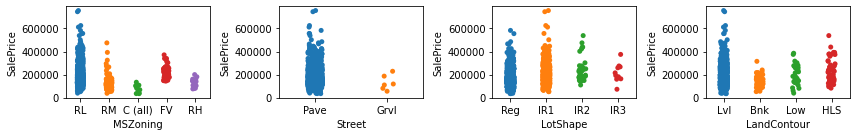

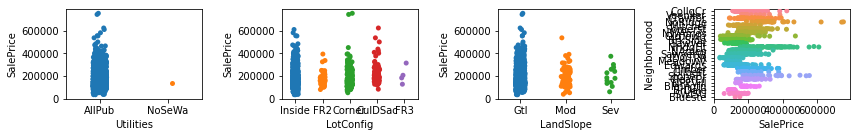

In [10]:
# check variables: MSZoning, Street, LotShape, LandContour
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(x = 'MSZoning',y = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(x = 'Street', y = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(x = 'LotShape', y = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(x = 'LandContour', y = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: Utilities, LotConfig, LandSlope, Neighborhood
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(x = 'Utilities',y = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(x = 'LotConfig', y = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(x = 'LandSlope', y = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'Neighborhood', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

**Remove Street and Utilities as these variables show no distinction between groups as far as sale price.**

In [11]:
# drop Street and Utilities
fdata.drop(['Street','Utilities'], axis = 'columns', inplace = True)

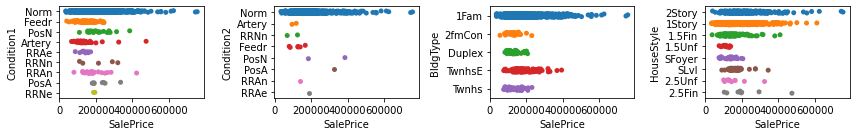

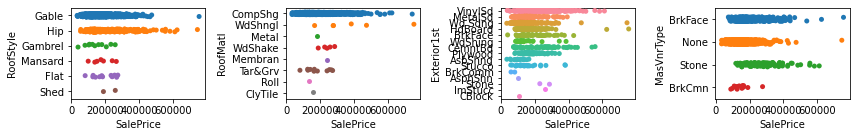

In [12]:
# check variables: Condition1, Condition2, BldgType, HouseStyle
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'Condition1',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'Condition2', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'BldgType', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'HouseStyle', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: RoofStyle, RoofMatl, Exterior1st, MasVnrType 
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'RoofStyle',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'RoofMatl', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'Exterior1st', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'MasVnrType', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

**Remove RoofMatl and Condition2 as these variables show no distinction between groups as far as sale price or have minimal points present across a few categories.**

In [13]:
# drop RoofMatl and Condition2
fdata.drop(['RoofMatl','Condition2'], axis = 'columns', inplace = True)


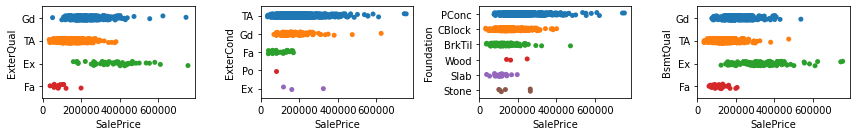

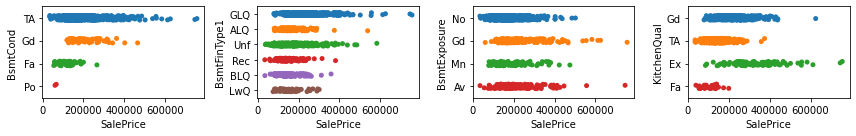

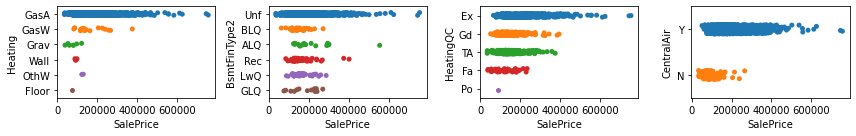

In [14]:
# check variables: ExterQual, ExterCond, Foundation, BsmtQual
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'ExterQual',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'ExterCond', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'Foundation', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'BsmtQual', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: BsmtCond, BsmtFinType1, BsmtExposure, KitchenQual, BsmtFinType2
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'BsmtCond',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'BsmtFinType1', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'BsmtExposure', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'KitchenQual', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: BsmtFinType2, Heating, HeatingQC, CentralAir
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'Heating',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'BsmtFinType2', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'HeatingQC', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'CentralAir', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

**Remove BsmtExposure and Heating as these variables show no distinction between groups as far as sale price or have minimal points present across a few categories.**

In [15]:
# drop BsmtExposure and Heating and BsmtFinType2
fdata.drop(['BsmtExposure','Heating', 'BsmtFinType2'], axis = 'columns', inplace = True)

**MSSubClass should be categorical as the values define categories.**

In [16]:
fdata['MSSubClass'] = fdata['MSSubClass'].astype('category') # convert MSSubClass


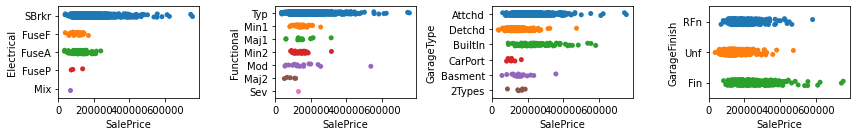

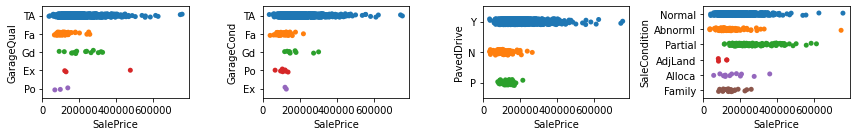

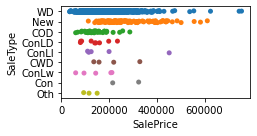

In [17]:
# check variables: Electrical, Functional, GarageType, GarageFinish
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'Electrical',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'Functional', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'GarageType', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'GarageFinish', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: GarageQual, GarageCond, PavedDrive, GarageFinish
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'GarageQual',x = 'SalePrice', data = fdata)
plt.subplot(1,4,2)
sns.stripplot(y = 'GarageCond', x = 'SalePrice', data = fdata)
plt.subplot(1,4,3)
sns.stripplot(y = 'PavedDrive', x = 'SalePrice', data = fdata)
plt.subplot(1,4,4)
sns.stripplot(y = 'SaleCondition', x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

# check variables: SaleType, SaleCondition
plt.figure(figsize = (12,2))
plt.subplot(1,4,1)
sns.stripplot(y = 'SaleType',x = 'SalePrice', data = fdata)
plt.tight_layout()
plt.show()

In [18]:
# drop variables
fdata.drop(['GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'], axis = 'columns', inplace = True)

In [21]:
# replace Functional to Typical/Average and Other
func_rep_dict = {'Min1':'Other', 'Maj1': 'Other', 'Min2':'Other', 'Mod':'Other', 'Maj2':'Other', 'Sev':'Other'}

fdata['Functional'].replace(func_rep_dict, inplace = True)

In [22]:
fdata.shape

(1460, 62)

Check the correlation for the numeric variables...

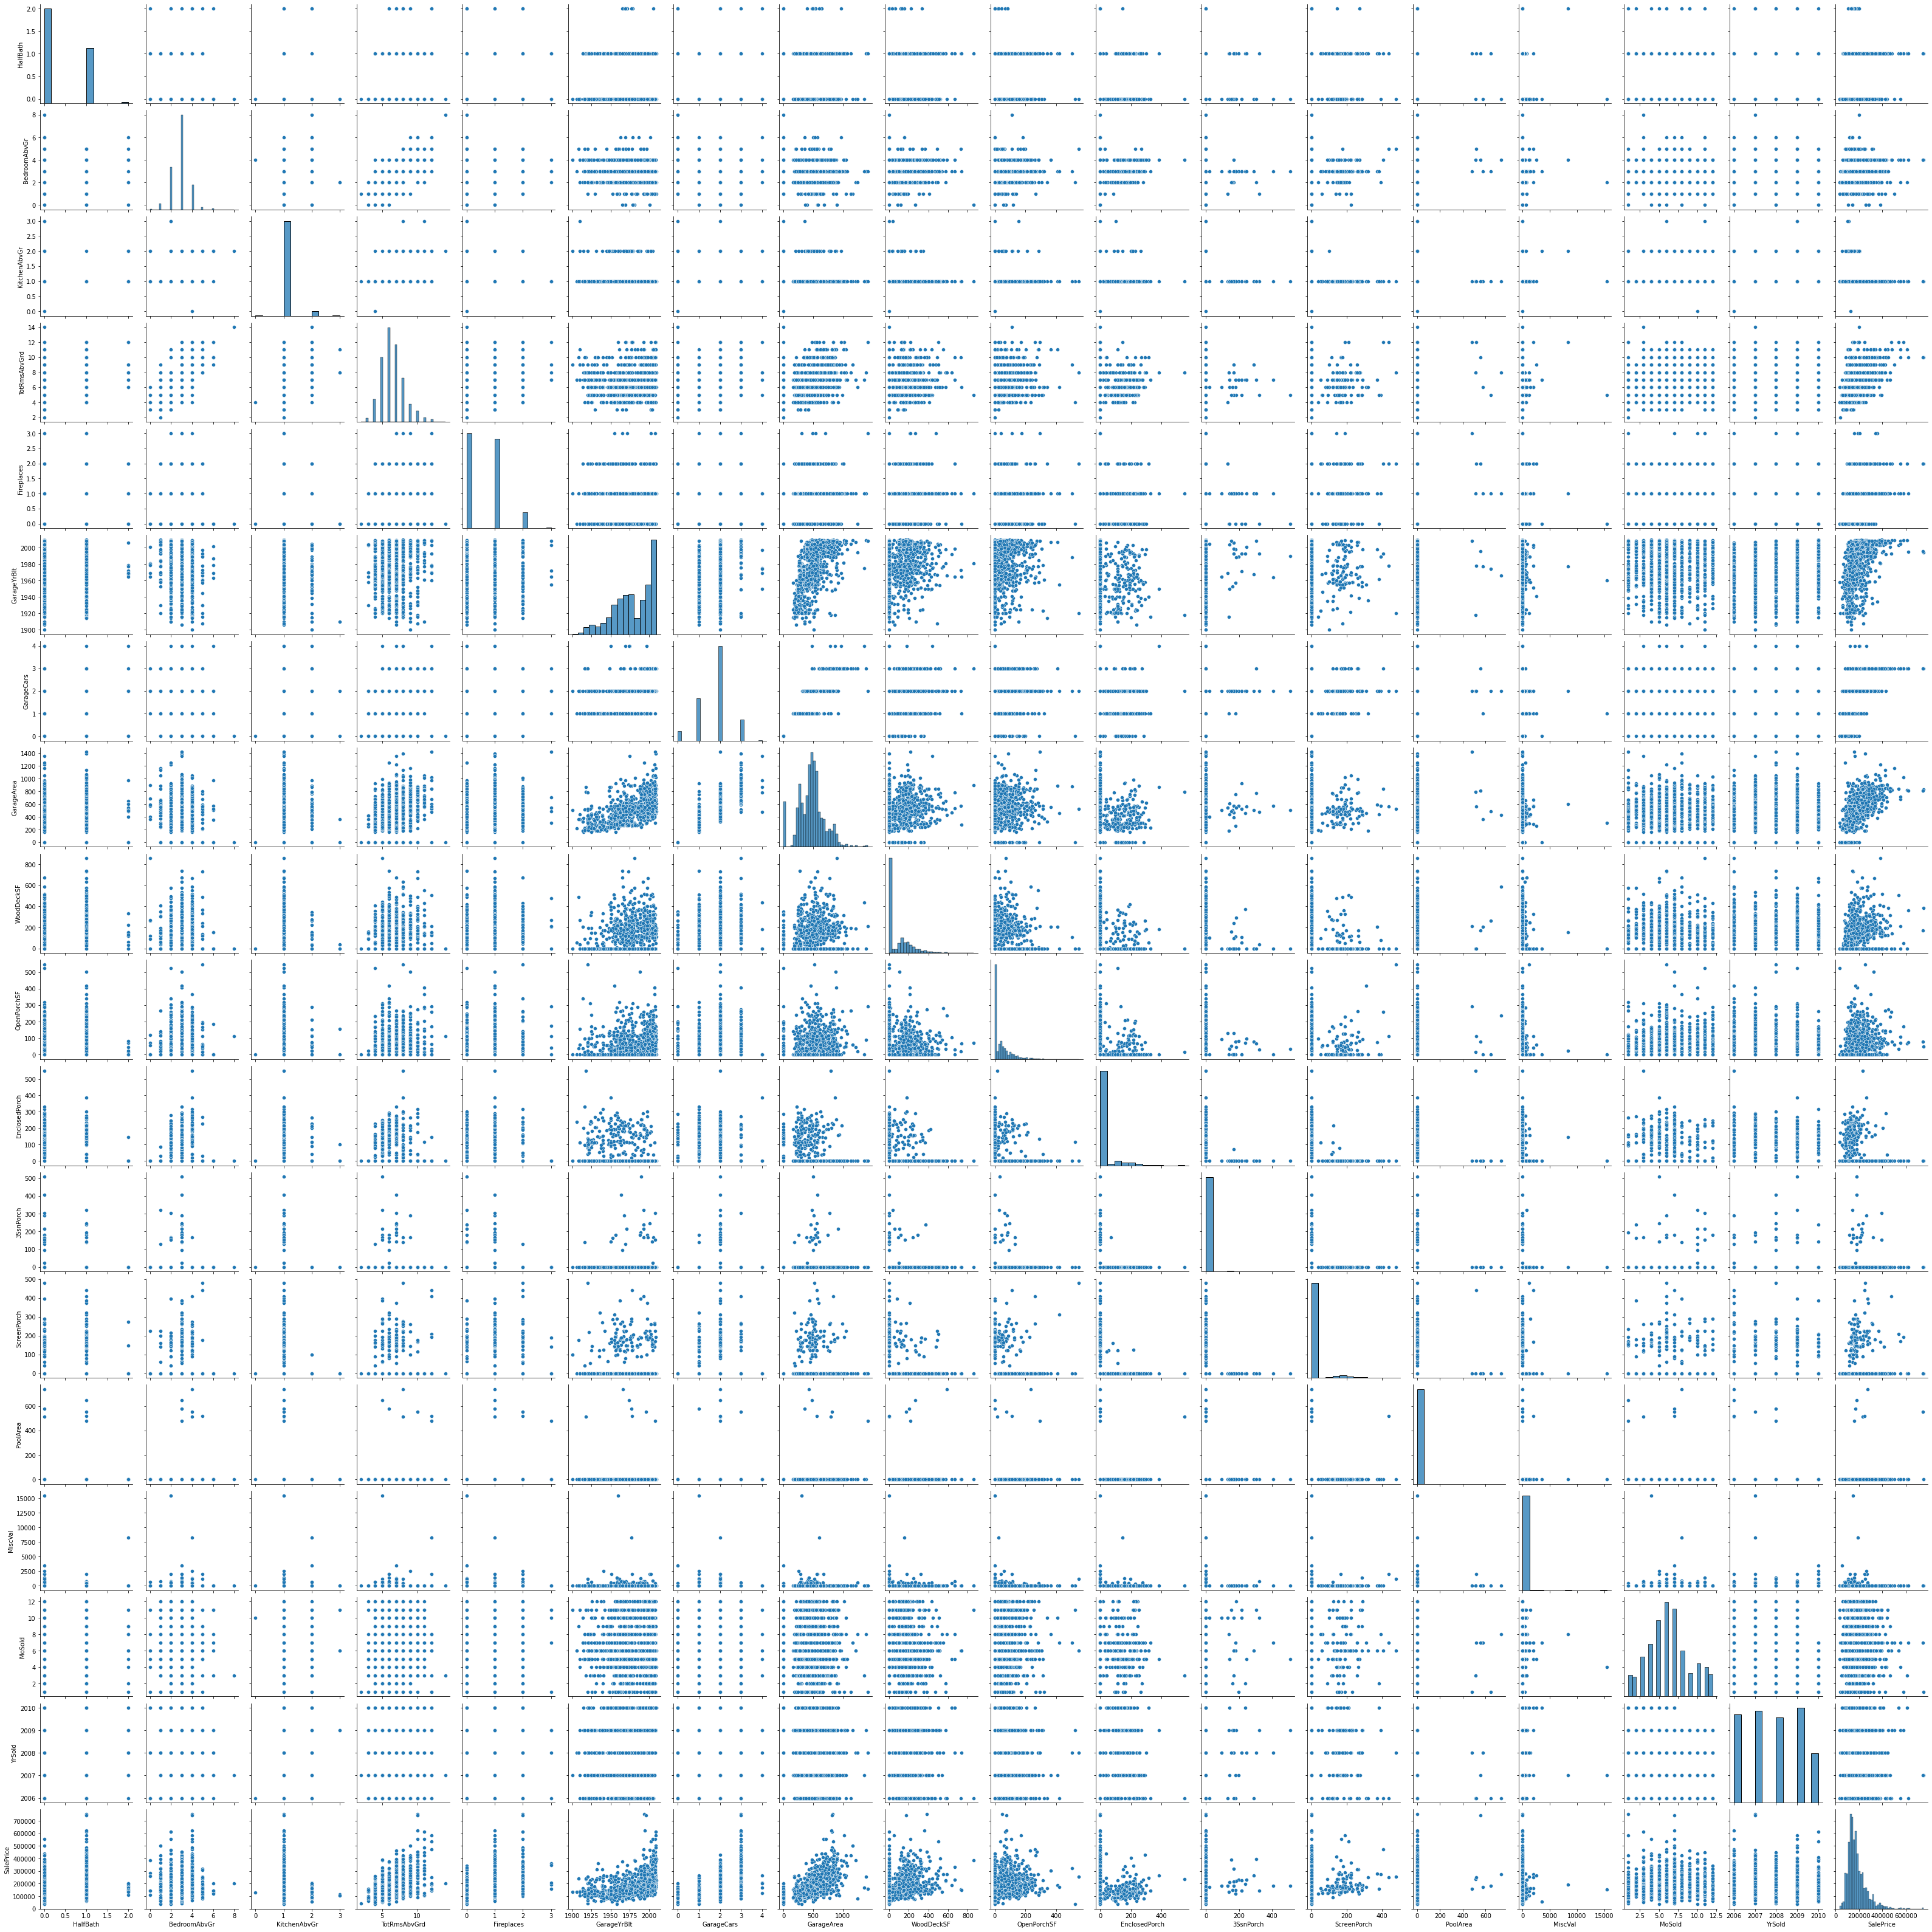

In [23]:
# view scatterplot for correlation for numeric variables
sns.pairplot(fdata.iloc[:,40:])
plt.show()

In [24]:
# get rid of columns that show minimal to no correlation
fdata.drop(['HalfBath', 'BedroomAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch'],
          axis = 'columns', inplace = True)


In [25]:
fdata.drop(['MiscVal','MoSold','YrSold','EnclosedPorch'], axis = 'columns', inplace = True)

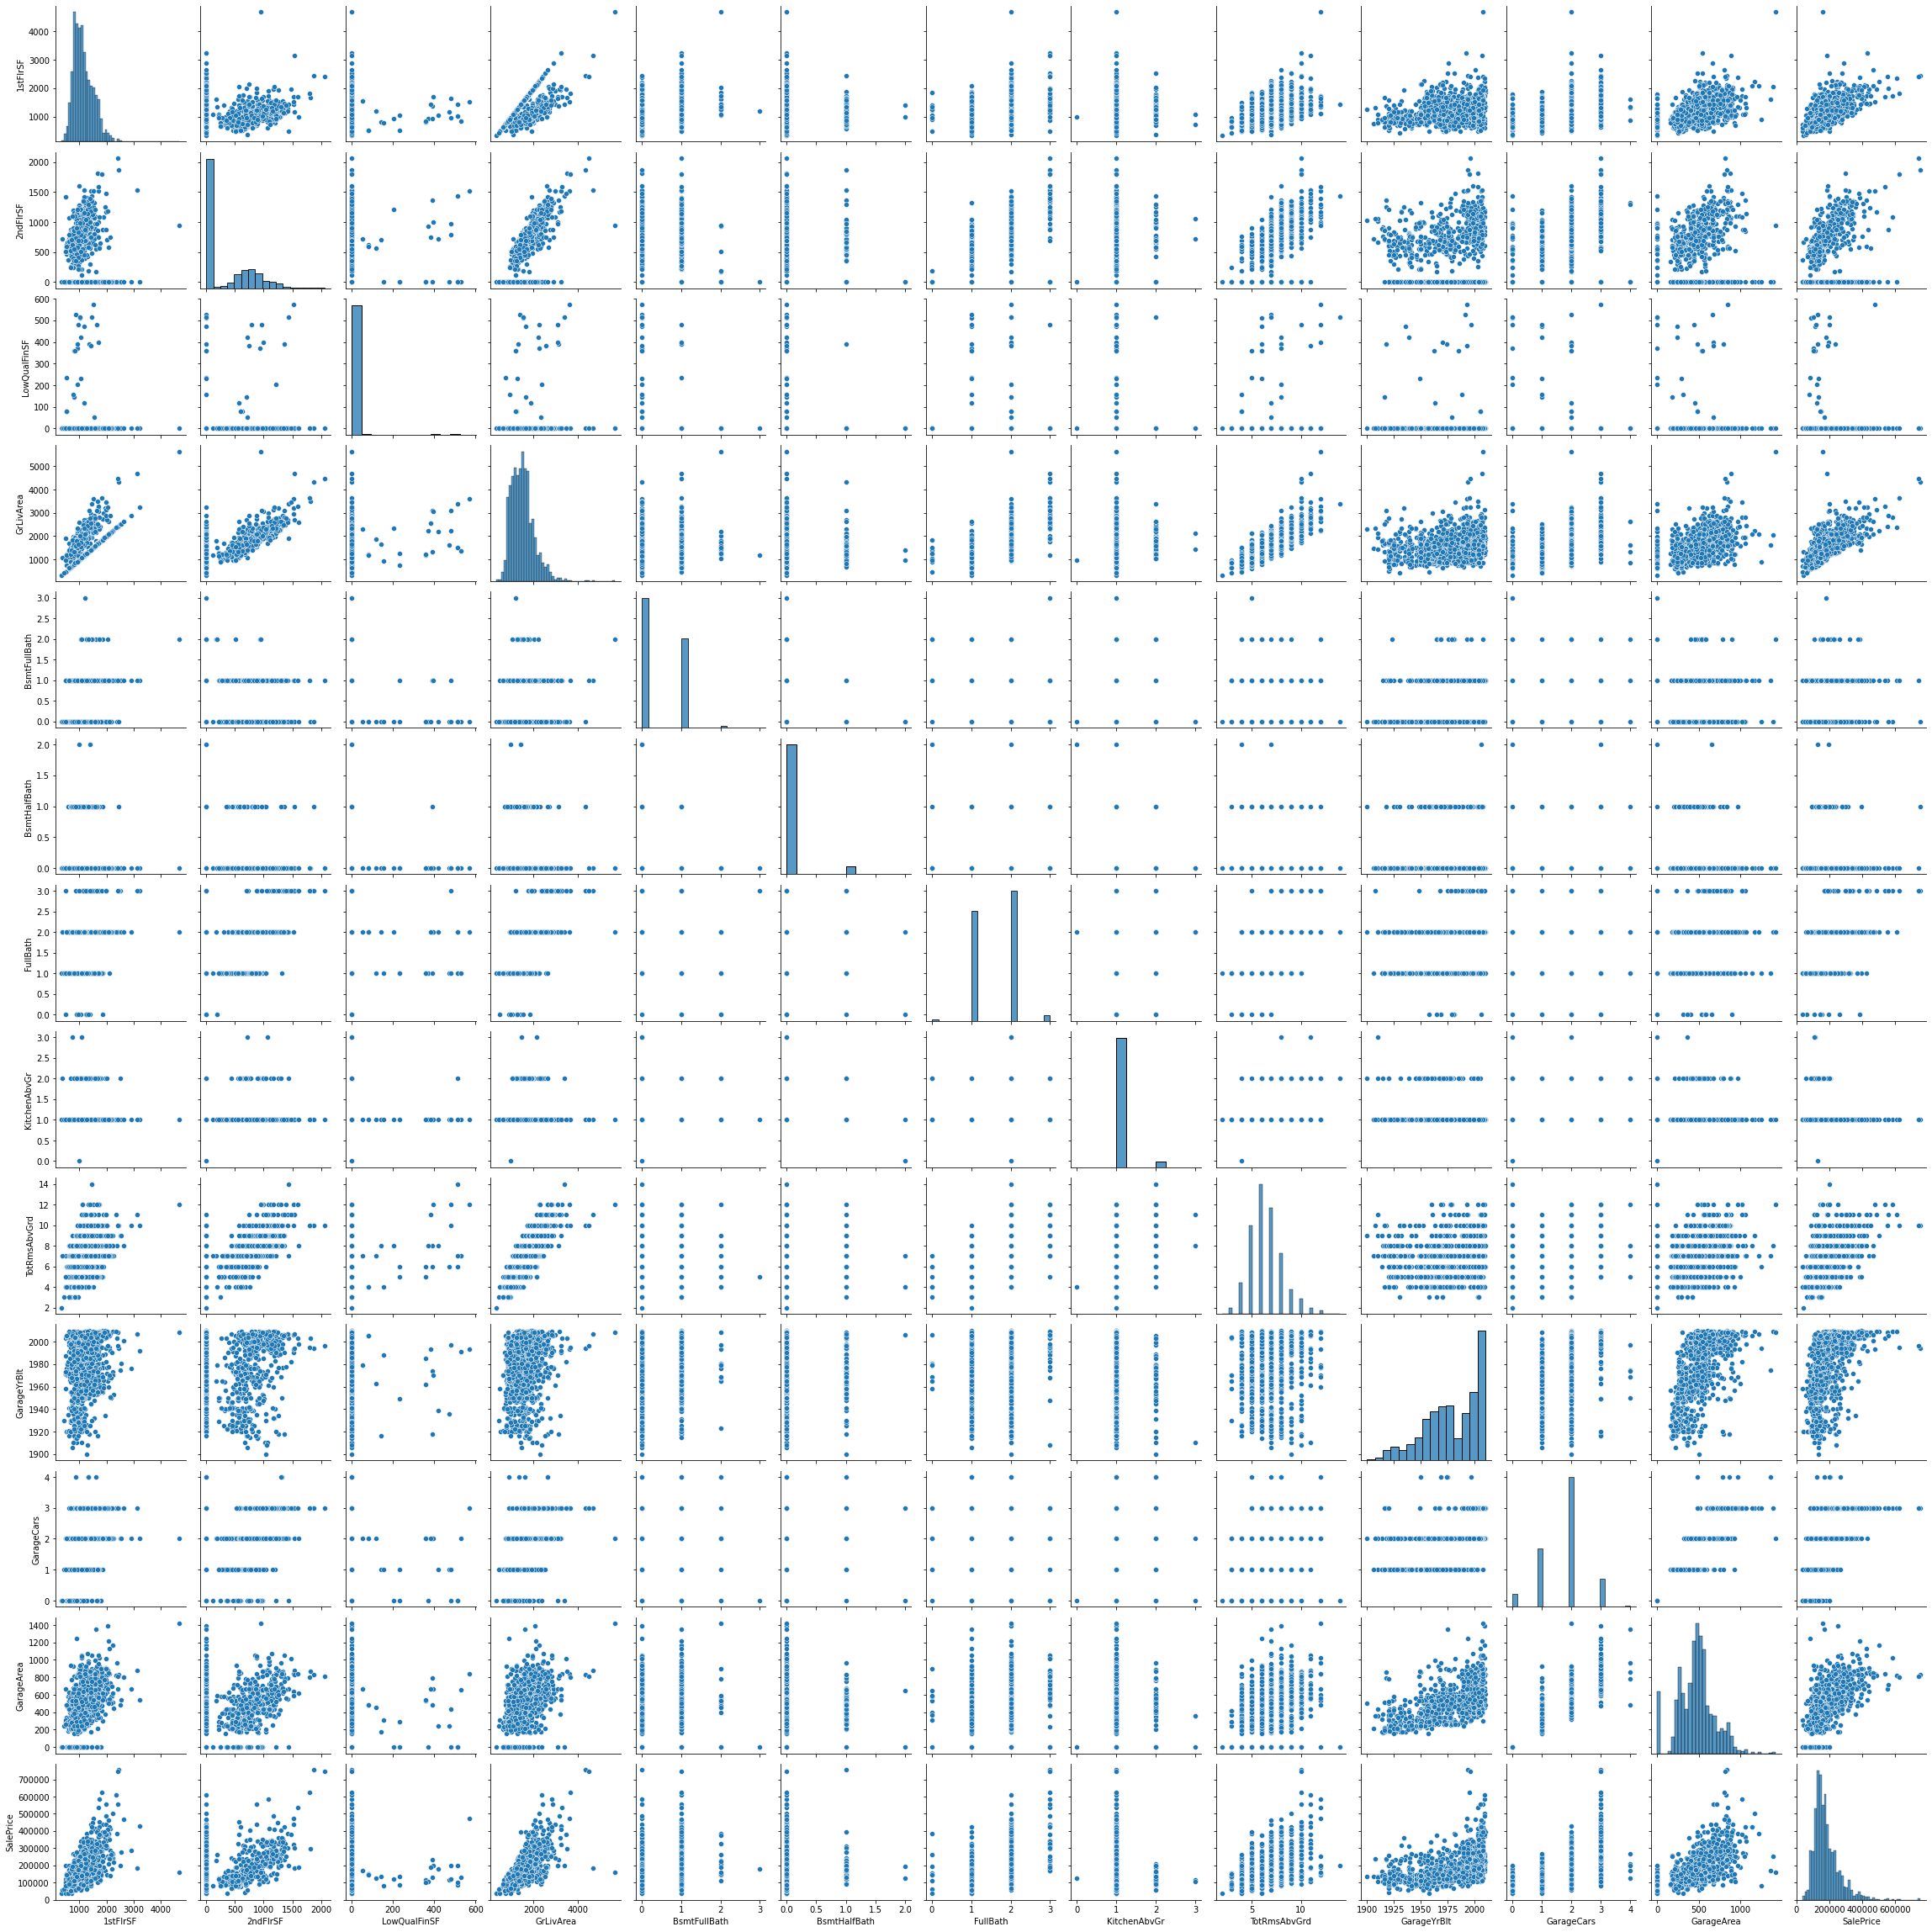

In [26]:
# view scatterplot for correlation for numeric variables
sns.pairplot(fdata.iloc[:,30:])
plt.show()

In [27]:
fdata.drop(['LowQualFinSF','BsmtFullBath', 'KitchenAbvGr', 'BsmtHalfBath'], axis = 'columns', inplace = True)

In [28]:
fdata.shape

(1460, 46)

In [29]:
fdata.drop(['LotArea','LotFrontage', 'OverallCond', 'YearBuilt','MasVnrArea', 'BsmtUnfSF','BsmtFinSF2', 'BsmtFinSF1'],
           axis = 'columns', inplace = True)

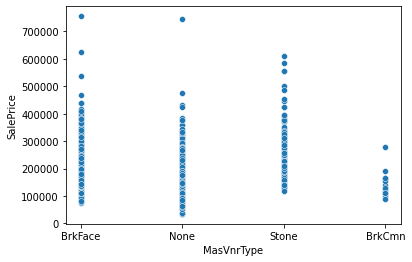

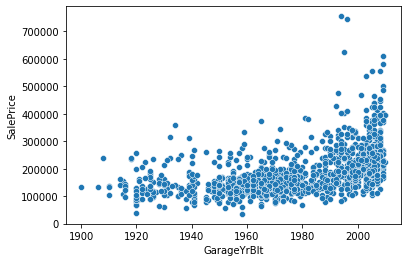

array([[1.        , 0.48636168],
       [0.48636168, 1.        ]])

In [30]:
sns.scatterplot(x = 'MasVnrType', y = 'SalePrice', data = fdata)
plt.show()
sns.scatterplot(x = 'GarageYrBlt', y = 'SalePrice', data = fdata)
plt.show()

gb_check = fdata.loc[:,['GarageYrBlt','SalePrice']].dropna() # heteroscedasticity 
np.corrcoef(gb_check.GarageYrBlt, gb_check.SalePrice)


In [31]:
# drop GarageYrBlt due to small samples at older years
fdata.drop(['GarageYrBlt', 'MasVnrType'], axis = 'columns', inplace = True)

In [32]:
for col in ['Electrical', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    fdata[col] = fdata[col].fillna(fdata[col].mode()[0])
    print(fdata[col].isnull().sum())

0
0
0
0


By studying the distributions of the data as it relates to the sales price, the feature space was significantly reduced which will help the model perform better and more accurately highlight the contributions made by each of the remaining features.

In [33]:
fdata.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,Exterior1st,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,GarageCars,GarageArea,PavedDrive,SaleCondition,SalePrice
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2003,Gable,VinylSd,Gd,TA,PConc,Gd,TA,GLQ,856,Ex,Y,SBrkr,856,854,1710,2,Gd,8,Typ,2,548,Y,Normal,208500
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,1976,Gable,MetalSd,TA,TA,CBlock,Gd,TA,ALQ,1262,Ex,Y,SBrkr,1262,0,1262,2,TA,6,Typ,2,460,Y,Normal,181500
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2002,Gable,VinylSd,Gd,TA,PConc,Gd,TA,GLQ,920,Ex,Y,SBrkr,920,866,1786,2,Gd,6,Typ,2,608,Y,Normal,223500
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,1970,Gable,Wd Sdng,TA,TA,BrkTil,TA,Gd,ALQ,756,Gd,Y,SBrkr,961,756,1717,1,Gd,7,Typ,3,642,Y,Abnorml,140000
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,2000,Gable,VinylSd,Gd,TA,PConc,Gd,TA,GLQ,1145,Ex,Y,SBrkr,1145,1053,2198,2,Gd,9,Typ,3,836,Y,Normal,250000


<h2>3.0 Models</h2> <a id = 'models'></a>

***

### 3.1 - Random Forest <a id = 'rf'></a>


In [35]:
# get key imports for modeling with RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import lightgbm

In [36]:
# seperate target vector and feature matrix
X = fdata.drop(['SalePrice'], axis = 'columns')
y = fdata['SalePrice']

In [37]:
# create dummy variables prior to loading into the model
X = pd.get_dummies(X)

In [38]:
# create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state = 28)

In [43]:
# set up pipe steps
steps = [('scaler', StandardScaler()), ('rf', RandomForestRegressor(random_state = 28))]

# create the pipeline
rf_model = Pipeline(steps)

# set parameters
params = {'rf__criterion': ['squared_error', 'absolute_error'],
         'rf__max_features': ['auto', 'sqrt', 'log2']}

# fit the object to the train set
rf_model = GridSearchCV(rf_model, params, cv=5)
rf_model.fit(X_train,y_train)

# cross val score
#cross_val_score(rf_model, X_train, y_train, cv = 5)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=28))]),
             param_grid={'rf__criterion': ['squared_error', 'absolute_error'],
                         'rf__max_features': ['auto', 'sqrt', 'log2']})

In [44]:
y_pred = rf_model.predict(X_test)

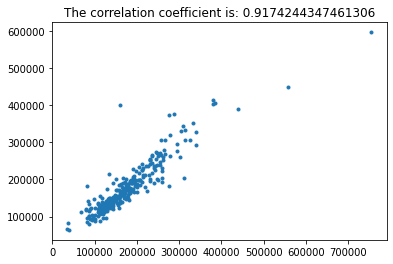

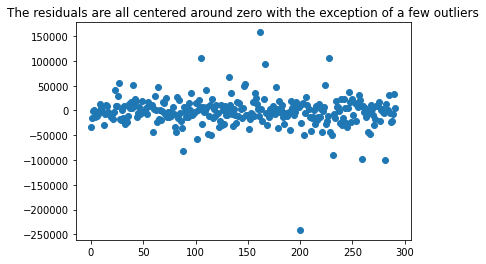

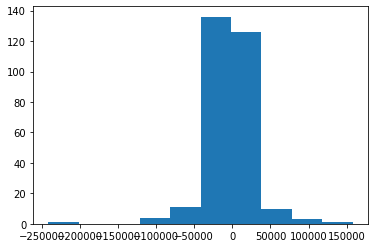

In [45]:
plt.plot(y_test, y_pred, marker = '.', linestyle = 'none')
plt.title(f'The correlation coefficient is: {np.corrcoef(y_test,y_pred)[0][1]}')
plt.show()
plt.scatter(range(len(y_test)), (y_test-y_pred))
plt.title('The residuals are all centered around zero with the exception of a few outliers')
plt.show()
plt.hist((y_test - y_pred))
plt.show()

In [46]:
# define RMSLE as a function
def rmsle(y_test, y_pred):
    vector_to_square = np.log(y_test + 1) - np.log(y_pred + 1)
    inside_avg = np.mean(vector_to_square**2)
    rmsle_value = np.sqrt(inside_avg)
    return rmsle_value

rmsle(y_test, y_pred)

0.1655104551373714

### 3.2 - Linear Regression <a id = 'lr'></a>

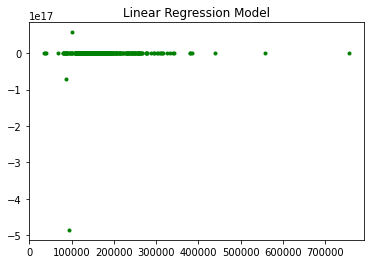

<ipython-input-46-38ee6139fd9e>:3: RuntimeWarning: invalid value encountered in log
  vector_to_square = np.log(y_test + 1) - np.log(y_pred + 1)


1.6004843295407136

In [47]:
# set up pipe steps
lr_steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]

# create the pipeline
lr_model = Pipeline(lr_steps)

# set parameters
# not worth using GridSearchCV

# fit to training set
lr_model.fit(X_train,y_train)

# predictions
y_pred = lr_model.predict(X_test)

# plot linear regression predictions
plt.plot(y_test, y_pred, marker = '.', linestyle = 'none', color='green')
plt.title('Linear Regression Model')
plt.show()

# print error metric
rmsle(y_test, y_pred)

The Random Forest Model performs better.

<h2>4.0 Testing & Evaluation</h2> <a id = 'testing_evaluation'></a>

***

### 4.1 Test Data - Cleaning & Preprocessing<a id = 'tdcap'></a>

In [49]:
# load the data
test_data = pd.read_csv('test.csv')


In [50]:
columns_to_keep = list(fdata.columns)[:-1]

In [51]:
test_data = test_data[columns_to_keep]

In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotShape       1459 non-null   object 
 3   LandContour    1459 non-null   object 
 4   LotConfig      1459 non-null   object 
 5   LandSlope      1459 non-null   object 
 6   Neighborhood   1459 non-null   object 
 7   Condition1     1459 non-null   object 
 8   BldgType       1459 non-null   object 
 9   HouseStyle     1459 non-null   object 
 10  OverallQual    1459 non-null   int64  
 11  YearRemodAdd   1459 non-null   int64  
 12  RoofStyle      1459 non-null   object 
 13  Exterior1st    1458 non-null   object 
 14  ExterQual      1459 non-null   object 
 15  ExterCond      1459 non-null   object 
 16  Foundation     1459 non-null   object 
 17  BsmtQual       1415 non-null   object 
 18  BsmtCond

In [53]:
for col in list(test_data.columns):
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotShape       1459 non-null   object 
 3   LandContour    1459 non-null   object 
 4   LotConfig      1459 non-null   object 
 5   LandSlope      1459 non-null   object 
 6   Neighborhood   1459 non-null   object 
 7   Condition1     1459 non-null   object 
 8   BldgType       1459 non-null   object 
 9   HouseStyle     1459 non-null   object 
 10  OverallQual    1459 non-null   int64  
 11  YearRemodAdd   1459 non-null   int64  
 12  RoofStyle      1459 non-null   object 
 13  Exterior1st    1459 non-null   object 
 14  ExterQual      1459 non-null   object 
 15  ExterCond      1459 non-null   object 
 16  Foundation     1459 non-null   object 
 17  BsmtQual       1459 non-null   object 
 18  BsmtCond

In [55]:
# convert to category like train data
test_data['MSSubClass'] = test_data['MSSubClass'].astype('category')

In [56]:
test_data['Functional'].replace(func_rep_dict, inplace = True)

### 4.2 Retrain Model w/ Full Training Data<a id = 'rm'></a>

In [57]:
# seperate target vector and feature matrix
X_train = fdata.drop(['SalePrice'], axis = 'columns')
y_train = fdata['SalePrice']

In [58]:
X_train = pd.get_dummies(X_train).drop(['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Electrical_Mix'], axis = 'columns')

In [59]:
X_train['MSSubClass_150'] = 0

X_train.shape

(1460, 167)

In [60]:
# fit the model to the full train set
rf_model.fit(X_train,y_train)

# cross val score
cross_val_score(rf_model, X_train, y_train, cv = 5)

array([0.85842322, 0.83328307, 0.88235815, 0.88625088, 0.85024718])

In [61]:
# get the predictions for the test set
# rough expectation around .16 RMSLE
X_test = pd.get_dummies(test_data)
X_test.shape

(1459, 167)

In [62]:
# fit model to get results
test_pred = rf_model.predict(X_test)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [63]:
# load in sample given
submission_format = pd.read_csv('sample_submission.csv')

In [64]:
submission_format.SalePrice = test_pred

In [66]:
submission_format.to_csv('submission_rf_model_best.csv', index=False)

### 4.3 Model Performance Score & Rank<a id = 'se'></a>

In [68]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="score_rank.png", width=1000, height=1000)

This model and score ranked 3746/4655 which is not that good. The next iteration will have better additional models like xgboost, lightgbm, etc.